In [27]:
import matplotlib.pyplot as plt
import obspy
import datetime as dt
import matplotlib.dates as mdates
import creep_event_picker as cep


In [28]:
path = "../../../Data/{p}/SAC/{q}.SAC".format(p='Central_San_Andreas_Fault',q ='xmm_0')
st = obspy.read(path)
tr = st[0]
tr.interpolate(sampling_rate=tr.stats.sampling_rate)
tm = tr.times("utcdatetime")
creep = tr.data
sample_rate =  round(tr.stats.delta)/60
tm_dt = []
for w in range(len(tm)):
    tm_new = tm[w].datetime
    tm_dt.append(tm_new)
tm_int, creep_int, upsampled = cep.interpolate(tm_dt,creep,sample_rate,5)

/Users/dagi9522/Library/CloudStorage/OneDrive-UCB-O365/Documents/Scripts/Creepmeter_processing/Creepmeter_data_processing/creep_event_picker.py:638: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interpolated = upsampled.interpolate(method='ffill') #interpolate the dataset to get a continious record evenly spaced at 10 mins


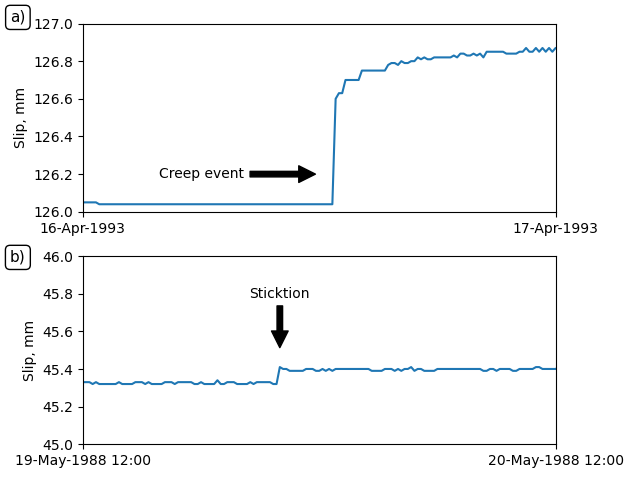

In [64]:
%matplotlib inline
plt.close('all')
fig = plt.figure()
ax = plt.subplot(2,1,1)
plt.plot(tm_int, creep_int)
plt.xlim(dt.datetime(1993,4,16),dt.datetime(1993,4,17))
plt.ylim(126,127)
plt.xticks([dt.datetime(1993,4,16),dt.datetime(1993,4,17)],\
           [dt.datetime(1993,4,16),dt.datetime(1993,4,17)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.ylabel('Slip, mm')
ax.annotate('Creep event',                # Annotation text
    xy=(dt.datetime(1993,4,16,12,0,0), 126.2),  # Point to annotate (x, y)
    xytext=(dt.datetime(1993,4,16,6,0,0), 126.2),            # Text position (x, y)  # Units for xytext
    arrowprops=dict(facecolor='black', shrink=0.05),
      verticalalignment='center',horizontalalignment='center'  # Arrow properties
)

ax = plt.subplot(2,1,2)
plt.plot(tm_int, creep_int)
plt.xlim(dt.datetime(1988,5,19,12),dt.datetime(1988,5,20,12))
plt.ylim(45,46)
plt.xticks([dt.datetime(1988,5,19,12,0,0),dt.datetime(1988,5,20,12,0,0)],[dt.datetime(1988,5,19,12,0,0),dt.datetime(1988,5,20,12,0,0)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y %H:%M'))
plt.ylabel('Slip, mm')
ax.annotate('Sticktion',                # Annotation text
    xy=(dt.datetime(1988,5,19,22,0,0), 45.5),  # Point to annotate (x, y)
    xytext=(dt.datetime(1988,5,19,22,0,0), 45.8),            # Text position (x, y)  # Units for xytext
    arrowprops=dict(facecolor='black', shrink=0.05),
      verticalalignment='center',horizontalalignment='center'  # Arrow properties
)


fig.text(0.03,0.97,'a)',verticalalignment='center',horizontalalignment='center', color='black', fontsize = 11,\
            bbox=dict(facecolor='white', boxstyle='round'))
fig.text(0.03,0.47,'b)',verticalalignment='center',horizontalalignment='center', color='black', fontsize = 11,\
            bbox=dict(facecolor='white', boxstyle='round'))
fig.tight_layout()
plt.savefig('../creep_event_example.pdf')
plt.show()